## Import Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [62]:
content = pd.read_csv('Content.csv')
location = pd.read_csv('Location.csv')
profile = pd.read_csv('Profile.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')
session = pd.read_csv('Session.csv')
user = pd.read_csv('User.csv')

## Exploring Data

In [63]:
reactions = reactions.dropna()
reactions = reactions.drop('Unnamed: 0', axis = 1)
reactions['Type'].unique()


array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [64]:
reaction_types = reaction_types.dropna()
reaction_types = reaction_types.drop('Unnamed: 0', axis = 1)
reaction_types

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [65]:
content = content[['Content ID', 'Type', 'Category']]
content = content.dropna()
content.rename(columns = {'Type': 'Content Type'}, inplace = True)
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

## Cleaning Data

In [66]:
content['Category'].replace(['studying', '"studying"', 'healthy eating', 'technology', '"technology"', 'food', 'cooking', 'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel', 'fitness', 'education', 'veganism', 'animals', 'culture', '"culture"', '"tennis"', '"food"', '"cooking"', '"public speaking"', '"veganism"', '"science"', '"animals"', '"soccer"', '"dogs"'], 
    ['Studying', 'Studying', 'Healthy Eating', 'Technology', 'Technology', 'Food', 'Cooking', 'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel', 'Fitness', 'Education', 'Veganism', 'Animals', 'Culture', 'Culture', 'Tennis', 'Food', 'Cooking', 'Public Speaking', 'Veganism', 'Science', 'Animals', 'Soccer', 'Dogs'], inplace = True)

content['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

## Merging Data

In [67]:
reactions_with_scoring = reactions.merge(reaction_types, how = 'left')
reactions_with_scoring

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12


In [68]:
reactions_with_scoring_and_content_info = reactions_with_scoring.merge(content, on = 'Content ID')
reactions_with_scoring_and_content_info

,Content ID,User ID,Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12,audio,Technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10,audio,Technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45,audio,Technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12,audio,Technology


## Reorganizing Columns


In [69]:
reactions_with_scoring_and_content_info.rename(columns = {'Type': 'Reaction Type'}, inplace = True)
reactions_with_scoring_and_content_info = reactions_with_scoring_and_content_info[['Content ID', 'Reaction Type', 'Datetime', 'User ID', 'Content Type', 'Category', 'Sentiment', 'Score']]
reactions_with_scoring_and_content_info

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,5d454588-283d-459d-915d-c48a2cb4c27f,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,92b87fa5-f271-43e0-af66-84fac21052e6,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,163daa38-8b77-48c9-9af6-37a6c1447ac2,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,34e8add9-0206-47fd-a501-037b994650a2,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,b6d04982-1509-41ab-a700-b390d6cb4d02,audio,Technology,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,audio,Technology,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,2bd9c167-e06c-47c1-a978-3403d6724606,audio,Technology,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,audio,Technology,negative,12


## Write to CSV

In [70]:
reactions_with_scoring_and_content_info.to_csv('final_data.csv')

## Making Visualizations

In [71]:
# rename dataframe
data = reactions_with_scoring_and_content_info

### Sentiments based on content type

In [90]:
photo_data = data[data['Content Type'] == 'photo']
video_data = data[data['Content Type'] == 'video']
gif_data = data[data['Content Type'] == 'GIF']
audio_data = data[data['Content Type'] == 'audio']

labels = ['Positive', 'Negative', 'Neutral']

photo_data

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,5d454588-283d-459d-915d-c48a2cb4c27f,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,92b87fa5-f271-43e0-af66-84fac21052e6,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,163daa38-8b77-48c9-9af6-37a6c1447ac2,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,34e8add9-0206-47fd-a501-037b994650a2,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...
22435,c54b49c4-b1f2-4641-8595-1cbd19937845,love,2020-12-12 21:17:55,a94a7d87-65df-4c21-847a-0e8af6cb5c02,photo,Science,positive,65
22436,c54b49c4-b1f2-4641-8595-1cbd19937845,disgust,2021-04-02 18:59:44,69f2735b-eee6-4fc1-a934-b31c20beb780,photo,Science,negative,0
22437,c54b49c4-b1f2-4641-8595-1cbd19937845,want,2020-09-17 02:27:46,af647535-dae8-4ca3-9203-bf4bfc607ffe,photo,Science,positive,70
22438,c54b49c4-b1f2-4641-8595-1cbd19937845,heart,2020-06-30 04:11:55,b870b764-7447-4990-a8d4-024d33e0e67d,photo,Science,positive,60


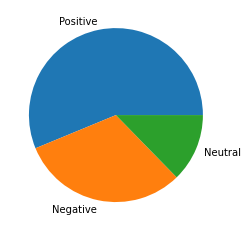

In [91]:
plt.pie(photo_data['Sentiment'].value_counts(), labels = labels)
plt.show()

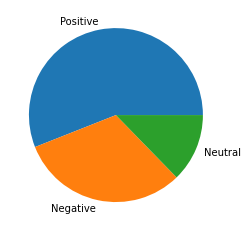

In [92]:
plt.pie(video_data['Sentiment'].value_counts(), labels = labels)
plt.show()

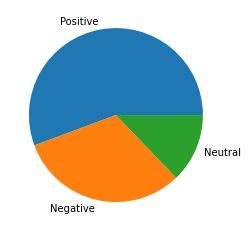

In [93]:
plt.pie(gif_data['Sentiment'].value_counts(), labels = labels)
plt.show()